In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [57]:

train = pd.read_csv('train.csv', parse_dates=['Date'])
test = pd.read_csv('test.csv', parse_dates=['Date'])
test_old = test
train = train.drop_duplicates()
test = test.drop_duplicates()

In [58]:
# Извлечение года, месяца и недели из даты
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Week'] = test['Date'].dt.isocalendar().week



In [59]:
Q1 = train['Weekly_Sales'].quantile(0.25)
Q3 = train['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.4 * IQR
upper_bound = Q3 + 1.25 * IQR

initial_shape = train.shape
train_data = train[(train['Weekly_Sales'] >= lower_bound) & (train['Weekly_Sales'] <= upper_bound)]
final_shape = train_data.shape


In [60]:


train_data = pd.get_dummies(train_data, columns=['Store'])
test = pd.get_dummies(test, columns=['Store'])




In [61]:
X = train_data.drop(['Weekly_Sales', 'Date'], axis=1)
y = train_data['Weekly_Sales']

X_test = test.drop(['Date'], axis=1)



MAPE: 0.08523737769877317


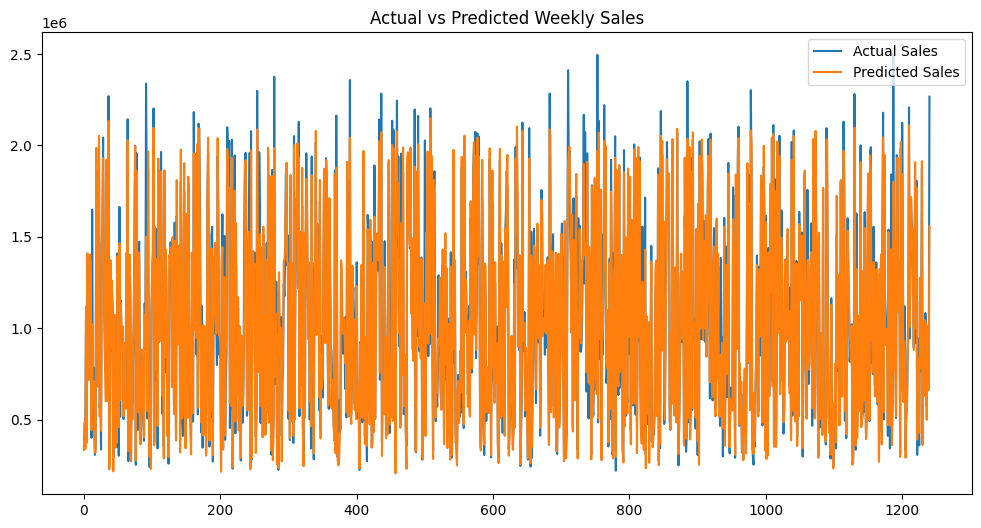

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mape = mean_absolute_percentage_error(y_val, y_pred)
print(f'MAPE: {mape:}')


plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title("Actual vs Predicted Weekly Sales")
plt.show()




In [63]:

test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'ID': test_old['Store'],
    'Weekly_Sales': test_predictions
})


submission.to_csv('submission.csv', index=False)
